<br/>
<center><h1>Counter-Strike: Global Offensive</h1></center>
<center><h2>eSports Statistical Analysis Tutorial Using Python and Pandas</h2></center>

<h3>Introduction To eSports and Counter-Strike</h3>

eSports is a synonym for competitive gaming. Competitive gaming has always been an important part of video game culture but is just now gaining recognition as a legitimate professional mainstream sport. 

The earliest recorded official video game competition took place in 1972 at Stanford University featuring the highly acclaimed multiplayer arcade game, Spacewar. The event gained the attention of the video game industry despite being small and limited only to Stanford students. Video game hardware and software companies saw income potential and started hosting competitions of their own. 

Fast forwarding to today, eSports generated \$696 million in revenue in 2017 alone, and its yearly revenue is expected to grow to \$1.4 billion in 2020. Revenue is generated through tournament audience admission, game developer sponsorships, tournament entry fees, and advertising contracts. In 2017, there were 191 million frequent viewers and 194 million occasional/one-time viewers. Maximum concurrent viewership has exceeded 2.3 million. Competitive gaming is particularly popular in North America, China, Sweden, and South Korea. Tournaments are viewable via Twitch, ESPN, and other online streaming platforms. 

This tutorial focuses on analyzing statistics of Counter-Strike Global Offensive, a popular competitive first-person shooter video game. We will perform data analysis on important first-person shooter statistics such as match wins/losses, kill/death ratios, and kill differentials of various players. These statistics can be used to help construct teams with a high likelihood of winning with a relatively low operation cost. Statistical based team optimization has been utilized by sports team management professionals for quite some time. In 2002, the Oakland Athletics made the first noteworthy use of these techniques. Increased public interest in the subject was generated through the 2003 release of the book Moneyball and its 2011 film adaption. 

All data will scraped and parsed from <a href="https://www.hltv.org/stats">HLTV</a>, one the gaming community’s most regarded media groups. 

<h3>Preparation</h3>

This tutorial utilizes Jupyter, an interactive computing notebook environment for Python. Jupyter provides a rich GUI with input and output history, making it ideal for data science related tasks. Jupyter is most easily accessed through a portable cross-platform computing environment called Docker. Docker includes all tools needed to perform the tasks described in this tutorial including a data analysis toolkit called Pandas, an HTML parser called Beautiful Soup, and a machine learning library called SKLearn. <a href="https://docs.docker.com/engine/installation/#desktop">Instructions for installing Docker can be found here</a>.
<br/><br/>Once installed, Docker will create a shortcut to an application called Anaconda on your desktop. Launch Anaconda and open Jupyter through the application manager. Click File > New Notebook > Python 3 to create a new workspace.<br/><br/>
Import all necessary libraries into your newly created workbook

In [1]:
# Import declarations
import math
import re as re
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

<h3>Data Scrapting and Sanitization</h3>

We will scrape team information from an HTML table, put it into a Pandas data frame, and sanitize it. A data frame is a Pandas construct that holds structured information for easy querying and analysis of information.<br/><br/>
Python has built-in networking functionality that allows us to send HTTP requests and retrieve raw HTML data back in the form of a string. An HTML parser called Beautiful Soup will take the raw HTML data and convert the table on the given page to a format readable by Pandas. The data then gets passed into the Pandas read_html function and a new data frame is generated. Data frame previews in this tutorial will be limited to 15 rows for the sake of brevity.<br/><br/>
Everything works properly except for the extraction of country names. HLTV's table presents country data in the form of a flag image instead of plain text. Fortunately, <a href="https://regexone.com/">regex</a> allows us to pull the text of an HTML image tag’s alternate property which contains plaintext country names.<br/><br/>
We will perform a preliminary sanitation by removing Tyloo since they play exclusively with low performing teams. This anomaly causes massive data skews and would ruin the integrity of some of our data analyses.

In [2]:
# Get the data
r = requests.get("https://www.hltv.org/stats/teams")

# Create a pandas with pulled data
root = bs(r.content, "html.parser") 
root.prettify()
table = (str)(root.find("table"))
teams = pd.read_html(table, header=0)[0]

# Pull the country data out of the table and put into our dataframe
table = table.strip("\\n")
countries = (re.findall('title="(.+)"/>', table))
teams['Country'] = pd.Series(countries)

# Clean up columns
teams.columns = ['Team', 'Maps', 'K/D Differential', 'K/D', 'Rating', 'Country']
teams = teams[['Team', 'Country', 'Maps', 'K/D Differential', 'K/D', 'Rating']]

# Delete Tyloo from dataframe for reasons mentioned above
teams = teams.drop([0])

# Get a series with all team names
teamlist = teams[teams.columns[0]]

# Display resultant panda
teams

,Team,Country,Maps,K/D Differential,K/D,Rating
1,Space Soldiers,Turkey,624,5120,1.10,1.06
2,FaZe,Europe,452,2350,1.06,1.06
3,NiP,Sweden,1232,11763,1.12,1.06
4,Kinguin,Poland,551,3392,1.07,1.05
5,Astralis,Denmark,449,3504,1.09,1.05
6,Luminosity,Brazil,573,3828,1.08,1.05
7,G2,France,658,1820,1.03,1.05
8,Titan,France,484,1269,1.03,1.04
9,TSM,Denmark,504,2863,1.07,1.04
10,OpTic,North America,467,2126,1.05,1.04


Repeat this process on HLTV’s player list. Players that are not in the list of HLTV's top 10 ranked teams can be discarded since they are not needed for our purposes. We will sort the data frame by team name so players from the same team are grouped together.

In [3]:
# Get the data
r = requests.get("https://www.hltv.org/stats/players")

# Create a pandas with pulled data
root = bs(r.content, "html.parser")
root.prettify()

# Pull the player data out of the table and put into our dataframe
table = (str)(root.find("table"))
players = pd.read_html(table, header=0)[0]

# An array containing a list of top 10 teams (according to HLTV's critically acclaimed ranking system)
topTeams = ['SK', 'FaZe', 'Astralis', 'NiP', 'Cloud9', 'G2', 'North', 'Virtus.pro', 'fnatic', 'Liquid']

# Discard player information for anyone not listed in the top 10 teams
players = players[players['Team'].isin(topTeams)]

players = players.sort_values('Team')
players.columns = ['Player', 'Team', 'Maps', 'K/D Differential', 'K/D', 'Rating']

# Display resultant panda
players

,Player,Team,Maps,K/D Differential,K/D,Rating
129,Kjaerbye,Astralis,893,1686,1.11,1.07
19,device,Astralis,1012,3942,1.24,1.16
293,gla1ve,Astralis,855,333,1.02,1.00
227,Xyp9x,Astralis,1189,1528,1.08,1.03
73,dupreeh,Astralis,1132,2756,1.14,1.09
116,Stewie2K,Cloud9,629,943,1.08,1.07
177,RUSH,Cloud9,682,882,1.08,1.04
119,tarik,Cloud9,759,1296,1.10,1.07
113,Skadoodle,Cloud9,836,2310,1.18,1.08
104,autimatic,Cloud9,658,1324,1.11,1.08


Getting the match data for the top 10 ranked teams is a bit more complicated. We need to store all ten of the team names and URLs into arrays. A for loop allows us to iterate through and parse the HTML data from all URLs, storing it into one unified data frame.

In [4]:
i = 0
masterDF = pd.DataFrame()

# Top teams
topTeamCountries = ['Brazil', 'EU', 'Denmark', 'Sweden', 'North America', 'France', 'Denmark', 'Russia', 'Sweden', 'North America']

# Top team URLS (for scraping match data)
topTeamMatches = ['https://www.hltv.org/stats/teams/matches/6137/SK', 'https://www.hltv.org/stats/teams/matches/6667/FaZe', \
                    'https://www.hltv.org/stats/teams/matches/6665/Astralis', 'https://www.hltv.org/stats/teams/matches/4411/NiP', \
                    'https://www.hltv.org/stats/teams/matches/5752/Cloud9', 'https://www.hltv.org/stats/teams/matches/5995/G2', \
                    'https://www.hltv.org/stats/teams/matches/7533/North?startDate=2017-01-01&endDate=2017-12-31', 'https://www.hltv.org/stats/teams/matches/5378/Virtus.pro', \
                    'https://www.hltv.org/stats/teams/matches/4991/fnatic', 'https://www.hltv.org/stats/teams/matches/5973/Liquid']

# Go through each of the top 10 teams match data, sanitize/clean it, and throw the match data into one unified master dataframe
for team in topTeamMatches :
    
    # Pull/scrape/parse data
    r = requests.get(team)
    root = bs(r.content, "html.parser") 
    root.prettify()
    table = (str)(root.find("table"))
    SK = pd.read_html(table, header=0)[0]
    
    # Give columns proper names
    SK.columns = ['Date', 'Event', 'Opponent', 'Map', 'Rating', 'W/L', 'Outcome']
    
    # Clean win/loss data and turn to numeric format for compatibilty with machine learning classifier
    SK.loc[SK.Outcome == 'W', 'Outcome'] = 1
    SK.loc[SK.Outcome == 'L', 'Outcome'] = 0
    SK.loc[SK.Outcome == 'T', 'Outcome'] = 0
    
    # Misc sanitation (datetime conversion, typecasting)
    SK['Outcome'] = SK['Outcome'].astype(str).astype(int)
    SK['Event'] = SK['Event'].astype(str)
    SK['Date'] = pd.to_datetime(SK['Date'])
    SK['Year'] = SK['Date'].dt.year
    SK['Team'] = topTeams[i]
    masterDF = masterDF.append(SK)
    i += 1
    
# Reset indexes so that they are from 0 to N instead of being random jumbled numbers
masterDF = masterDF.reset_index(drop=True)

# Drop unneeded colums and clean up names of other columns
masterDF = masterDF.drop(['Event', 'Opponent'], axis=1)
masterDF = masterDF.rename(index=str, columns={"Map" : "Opponent", "Rating" : "Map"})
cols = masterDF.columns.tolist()
cols = cols[-1:] + cols[:-1]
masterDF = masterDF[cols]

# Print resultant dataframe of all merged together top 10 team historic match results
masterDF

,Team,Date,Opponent,Map,W/L,Outcome,Year
0,SK,2018-01-20,mousesports,Mirage,16 - 12,1,2018
1,SK,2018-01-19,Space Soldiers,Mirage,16 - 13,1,2018
2,SK,2017-10-12,FaZe,Train,19 - 16,1,2017
3,SK,2017-10-12,FaZe,Mirage,16 - 9,1,2017
4,SK,2017-10-12,FaZe,Overpass,16 - 11,1,2017
5,SK,2017-10-12,FaZe,Inferno,13 - 16,0,2017
6,SK,2017-09-12,Misfits,Overpass,16 - 1,1,2017
7,SK,2017-09-12,Misfits,Cobblestone,16 - 6,1,2017
8,SK,2017-06-12,Misfits,Cache,16 - 7,1,2017
9,SK,2017-06-12,NRG,Cache,16 - 9,1,2017


<h3>Visualization</h3>

Visualization is an invaluable tool in the world of data science. It helps people understand data trends more efficiently than sifting through raw numbers. Pandas and pyplot make graphical data representation very easy.

Average kill/death ratio of teams given:  1.045059523809524


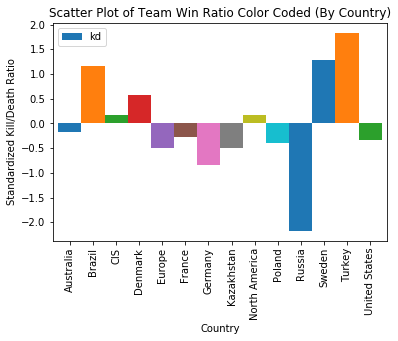

In [5]:
# Compute standardized Kill/Death ratio for every country using groupby clauses
g = teams.groupby("Country")
kd = g.mean()['K/D']
avg = kd.mean()
std = kd.std()
normalized_kd = []
for c in kd:
    normalized_kd.append((c-avg)/std)
    
ts = teams['Country'].sort_values().unique()
temp = pd.DataFrame({'teams': ts, 'kd': normalized_kd})

print("Average kill/death ratio of teams given: ", avg)

# Create scatter plot of team win ratio (by country)
ax = temp.plot(kind='bar',x='teams',y='kd', title='Scatter Plot of Team Win Ratio Color Coded (By Country)', width = 1)
ax.set_xlabel('Country')
ax.set_ylabel('Standardized Kill/Death Ratio')
plt.show()

This plot shows us that Russia has currently been struggling while countries such as Turkey and Sweden have been prospering. The average kill/death ratio for the teams analyzed above exceeds 1 since we are only processing data for the upper echelon of teams from their countries. More precisely, countries without teams in the upper 30% of kill/death ratios are not represented.

Next is a visual representation of the top 10 team win rates.

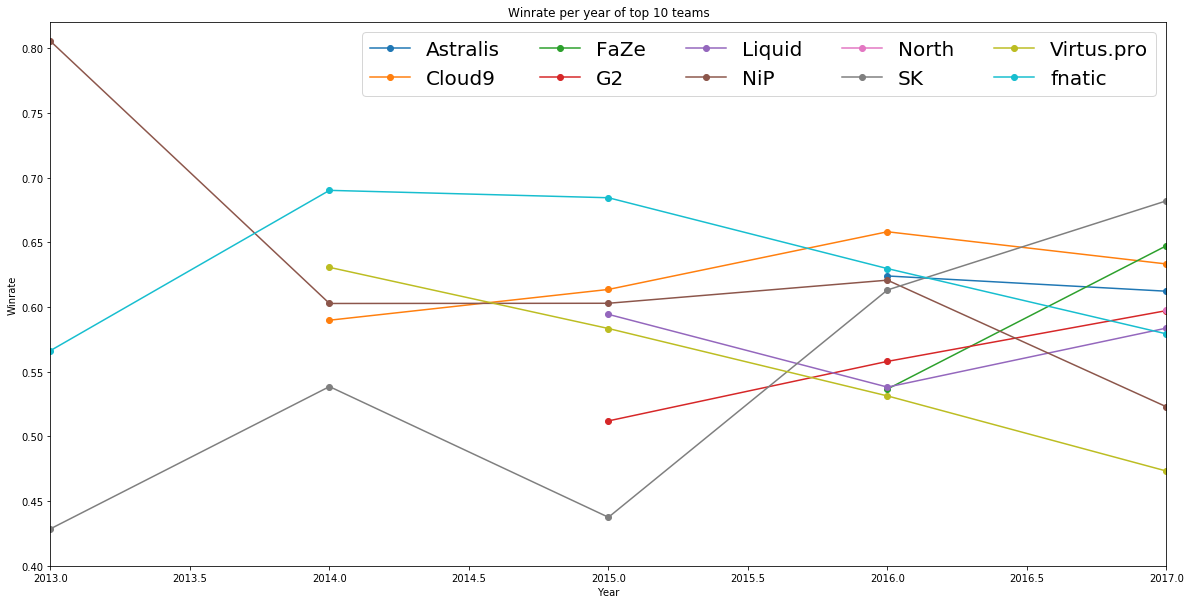

NiP win rate in 2012: 0.984375
NiP win rate in 2013: 0.8053435114503816
NiP win rate in 2014: 0.6026785714285714
NiP win rate in 2015: 0.6028368794326241
NiP win rate in 2016: 0.6206896551724138
NiP win rate in 2017: 0.5228426395939086


In [6]:
# Get Outcome groups for Team, Year
chanz = masterDF.groupby(['Team','Year'])['Outcome'].mean()
cha = chanz.to_frame()
cha['o'] = chanz.index.get_level_values('Team')
cha['f'] = chanz.index.get_level_values('Year')

cha = cha.reset_index(drop=True)
cha = cha.rename(columns={'Outcome': 'Outcome', 'o': 'Team', 'f': 'Year'})

# Group by team and get unique
ts = cha.groupby('Team')
names = ts['Team'].unique()
flat_names = [item for sublist in names for item in sublist]

# Format plot
plt.figure(figsize=(20,10))
plt.xlim(2013,2017)
plt.ylim(.4, .82)
plt.title("Winrate per year of top 10 teams")
plt.ylabel('Winrate')
plt.xlabel('Year')

# Plot for each team
for k,v in ts:
    plt.plot(v['Year'], v['Outcome'],marker='o')
    
plt.legend(flat_names, ncol=5, prop={'size': 20})

# Show aformentioned plot
plt.show()

# Print out significant data about NiP
wrs = ts.get_group('NiP')['Outcome'].tolist()
years = ['2012','2013','2014','2015','2016','2017']

for i in range(0,6):
    print("NiP win rate in " + years[i] + ":", wrs[i])

The most significant conclusion that can be made at first glance is that NiP's performance dropped dramatically after their 2012 legendary record of 87 wins to 0 losses. NiP has been in decline ever since. It is also clear that SK's performance during 2015 and every subsequent year has been phenomenal and continues to improve. The significant shifts in performance of these two teams are best explained by major team roster changes.

A player’s kill/death differential is calculated by subtracting kills from deaths. It documents the quantity of kills and deaths whereas the kill/death ratio only provides a success rate. As in other sports, Counter-Strike teams often include star players who consistently make high contributions to their team. Having a graphical representation of a team’s mean kill/death differential and the team’s top player’s kill/death differential makes for quick comparisons.<br/>

Means and maxes of the kill/death differential for each team can be obtained by using Pandas group by clauses. Mean and maximum kill/death differentials are printed above the graph for clarity.


Means of K/D Difference per team
 Team
Astralis      2049.0
Cloud9        1351.0
FaZe          1976.6
G2            2208.6
Liquid         826.0
NiP           2667.4
North          700.2
SK            1914.2
Virtus.pro    1157.2
fnatic        1601.2
Name: K/D Diff, dtype: float64

Maximums of K/D Difference per team
 Team
Astralis      3942
Cloud9        2310
FaZe          3998
G2            4883
Liquid        1529
NiP           5009
North         2616
SK            3729
Virtus.pro    2184
fnatic        3006
Name: K/D Diff, dtype: int64


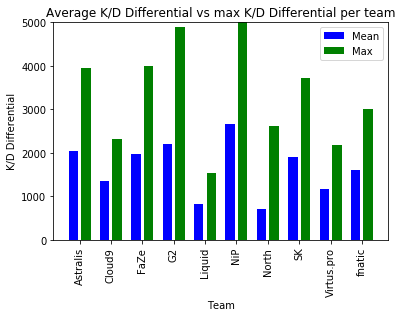

How much better each teams best player did versus average of players on the team
Astralis : 51.98 %
Cloud9 : 58.48 %
FaZe : 49.44 %
G2 : 45.23 %
Liquid : 54.02 %
NiP : 53.25 %
North : 26.77 %
SK : 51.33 %
Virtus.pro : 52.99 %
fnatic : 53.27 %


In [7]:
means = []
maxs = []
teams = players['Team'].sort_values().unique()
stuff = players.groupby('Team')

# Get the means and maxes from the groups and format the columns
means = stuff.mean()
maxs = stuff.max()
means.columns = ['Maps', 'K/D Diff', 'K/D', 'Rating']
maxs.columns = ['Player', 'Maps', 'K/D Diff', 'K/D', 'Rating']

# Print the data I got
print("Means of K/D Difference per team\n", means['K/D Diff'])
print("\nMaximums of K/D Difference per team\n", maxs['K/D Diff'])

# Plot the bar graph with means as blue and maxs as green
ax = plt.subplot(111)
ax.bar([.8,1.8,2.8,3.8,4.8,5.8,6.8,7.8,8.8,9.8], means['K/D Diff'], width=0.3,color='b',align='center')
ax.bar([1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2], maxs['K/D Diff'],width=0.3,color='g',align='center')
plt.xticks([1,2,3,4,5,6,7,8,9,10], teams, rotation='vertical')

# Graph formatting
ax.set_ylim([0, 5000])
ax.legend(['Mean', 'Max'])
plt.title("Average K/D Differential vs max K/D Differential per team")
plt.ylabel('K/D Differential')
plt.xlabel('Team')

plt.show()

me = means['K/D Diff'].tolist()
ma = maxs['K/D Diff'].tolist()

# Print the differences in the star player vs mean players
print("How much better each teams best player did versus average of players on the team")
for i in range(len(me)):
    c = (me[i]/ma[i])*100
    print(teams[i], ": %.2f" %c, "%")


<h3>Machine Learning</h3>

Machine learning enables us to predict future match performance. We will analyze high performing teams in clusters grouped by country. The linear support vector learning classifier is very powerful and will lend itself well to this task. Since SVMs only accept numerical data input, match dates need to be converted into <a href="https://en.wikipedia.org/wiki/Ordinal_date">ordinal format</a> before being passed into SKLearn.

SKLearn will handle all the heavy lifting. We will give SKLearn the training data, perform a 10-point cross validation, and plot the learning curve of our classifier below. The cross mean and standard error we generate demonstrates how effectively the machine learning classifier is operating.

Linear SVM 10 Point Cross Validation On Europe Data
[ 0.49714286  0.52        0.42857143  0.48        0.44        0.41142857
  0.45977011  0.49132948  0.40462428  0.54913295]


Linear SVM 10 Point Cross Validation On America Data
[ 0.45637584  0.34899329  0.27027027  0.27027027  0.31081081  0.48979592
  0.49659864  0.50340136  0.5170068   0.49659864]


Linear SVM 10 Point Cross Validation On Sweden Data
[ 0.42672414  0.52155172  0.40692641  0.24242424  0.59307359  0.58008658
  0.53913043  0.52608696  0.53913043  0.53043478]


Linear SVM Cross Mean and Standard Error For Europe Data
Accuracy: 0.47 (+/- 0.09)


Linear SVM Cross Mean and Standard Error For America Data
Accuracy: 0.42 (+/- 0.20)


Linear SVM Cross Mean and Standard Error For Sweden Data
Accuracy: 0.49 (+/- 0.20)


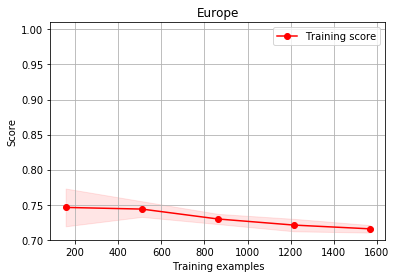

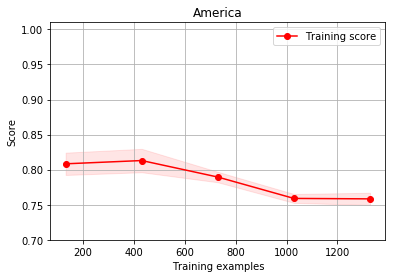

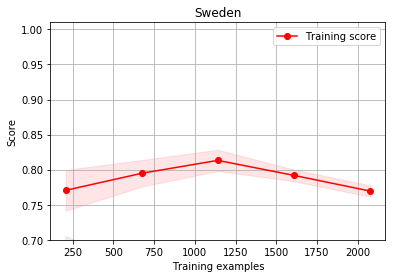

In [8]:
# Convert datetime data to ordinal format so it can be used in our machine learning classisfier
masterDF['Date'] = masterDF['Date'].apply(lambda x: x.toordinal())

# A function that plots a learning curve of a given machine learning classifier (provided by SKLearn documentation)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")

    plt.legend(loc="best")
    return plt

# Lump groups of countries together for machine learning purposes
europe = masterDF[(masterDF.Team == 'Astralis') | (masterDF.Team == 'North') | (masterDF.Team == 'G2') | (masterDF.Team == 'FaZe')]
america = masterDF[(masterDF.Team == 'C9') | (masterDF.Team == 'Liquid') | (masterDF.Team == 'SK')]
sweden = masterDF[(masterDF.Team == 'NiP') | (masterDF.Team == 'fnatic')]

# Create SKlearn machine learning classifier
eursvc = svm.SVC()
amersvc = svm.SVC()
swedsvc = svm.SVC()

# Give the machine learning classifiers the training data
eursvc.fit(europe.Date.values.reshape((len(europe),1)), europe.Outcome)
amersvc.fit(america.Date.values.reshape((len(america),1)), america.Outcome)
swedsvc.fit(sweden.Date.values.reshape((len(sweden),1)), sweden.Outcome)

# Perform a cross validation analysis on each of the three country group classifiers
europesvm = cross_val_score(eursvc, europe.Date.values.reshape((len(europe),1)), europe.Outcome, cv=10)
americasvm = cross_val_score(amersvc, america.Date.values.reshape((len(america),1)), america.Outcome, cv=10)
swedensvm = cross_val_score(swedsvc, sweden.Date.values.reshape((len(sweden),1)), sweden.Outcome, cv=10)

# Perform a 10 point cross validation on Europe group
print ("Linear SVM 10 Point Cross Validation On Europe Data")
print(europesvm)
print ("\n")

# Perform a 10 point cross validation on America group
print ("Linear SVM 10 Point Cross Validation On America Data")
print(americasvm)
print ("\n")

# Perform a 10 point cross validation on Sweden group
print ("Linear SVM 10 Point Cross Validation On Sweden Data")
print(swedensvm)
print("\n")

# Cross mean and standard error stats for each country under SVM classifier
print ("Linear SVM Cross Mean and Standard Error For Europe Data")
print("Accuracy: %0.2f (+/- %0.2f)" % (europesvm.mean(), europesvm.std() * 2))
print("\n")

print ("Linear SVM Cross Mean and Standard Error For America Data")
print("Accuracy: %0.2f (+/- %0.2f)" % (americasvm.mean(), americasvm.std() * 2))
print("\n")

print ("Linear SVM Cross Mean and Standard Error For Sweden Data")
print("Accuracy: %0.2f (+/- %0.2f)" % (swedensvm.mean(), swedensvm.std() * 2))

# Plot the learning curves for each of the three country groups
plot_learning_curve(eursvc, "Europe", europe.Date.values.reshape((len(europe),1)), europe.Outcome, ylim=(0.7, 1.01), cv=10, n_jobs=4)
plot_learning_curve(amersvc, "America", america.Date.values.reshape((len(america),1)), america.Outcome, ylim=(0.7, 1.01), cv=10, n_jobs=4)
plot_learning_curve(swedsvc, "Sweden", sweden.Date.values.reshape((len(sweden),1)), sweden.Outcome, ylim=(0.7, 1.01), cv=10, n_jobs=4)

# Show the learning curves
plt.show()

Since machine learning works best when provided with large quantities of data, we will cluster together all-star teams from Europe, America, and Sweden. Europe's top teams are Astralis, North, G2, and FaZe. America's top teams are C9, Liquid, and SK. Sweden's top teams are NiP and fnatic.<br/>

Our classifiers can predict win/loss ratios for the next 250 games that each country cluster plays. Unsurprisingly, Sweden is projected to continue to dominate the sport.

Predicted Outcome of Next 250 Games By Best European Teams (Astralis, North, G2, and FaZe)


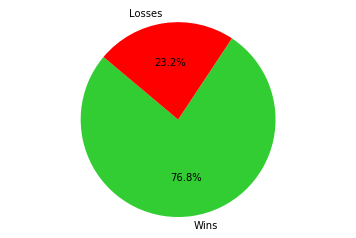


Predicted Outcome of Next 250 Games By Best American Teams (C9, Liquid, and SK)


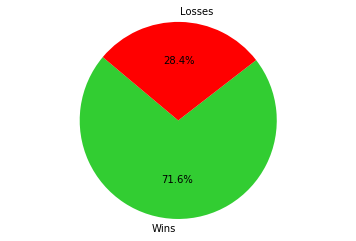


Predicted Outcome of Next 250 Games By Best Swedish Teams (NiP and fnatic)


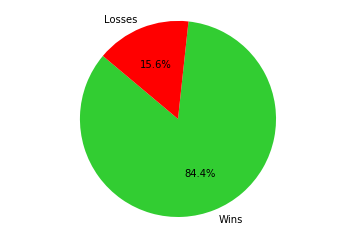

In [9]:
# Initialize win count variables for each predicition
ewincount = 0
awincount = 0
swincount = 0

# Calculate the each country group amount of wins for the next 250 games
for x in range(735621, 735871):
    if eursvc.predict([[x]]) == [1] :
        ewincount += 1

for x in range(735621, 735871):
    if amersvc.predict([[x]]) == [1] :
        awincount += 1

for x in range(735621, 735871):
    if swedsvc.predict([[x]]) == [1] :
        swincount += 1
        
# Output Europe group predicition results
print("Predicted Outcome of Next 250 Games By Best European Teams (Astralis, North, G2, and FaZe)")
plt.pie([ewincount, 250-ewincount], explode=(0, 0), labels=['Wins', 'Losses'], colors=['limegreen', 'red'],
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.show()

# Output America group predicition results
print("\nPredicted Outcome of Next 250 Games By Best American Teams (C9, Liquid, and SK)")
plt.pie([awincount, 250-awincount], explode=(0, 0), labels=['Wins', 'Losses'], colors=['limegreen', 'red'],
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.show()

# Output Sweden group predicition results
print("\nPredicted Outcome of Next 250 Games By Best Swedish Teams (NiP and fnatic)")
plt.pie([swincount, 250-swincount], explode=(0, 0), labels=['Wins', 'Losses'], colors=['limegreen', 'red'],
        autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.show()

<strong>That's it! I hope you enjoyed following my introductory tutorial on data scraping, data sanitization, data visualization, and machine learning.<br/><br/>A compiled HTML version of this notebook can be <a href="https://agusterodin.github.io/CSGO-Stat-Analysis/">found here</a>. Happy scraping!</strong>

Created by <a href="https://github.com/krutch777">Michael Rosen</a><br/><br/>